In [2]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io

In [4]:
annFile = './data/coco/annotations/person_keypoints_train2014.json'
coco = COCO(annFile)

loading annotations into memory...
Done (t=6.78s)
creating index...
index created!


In [5]:
# 人のカテゴリのみ抽出
catIds = coco.getCatIds(catNms=['person'])
catIds

[1]

In [6]:
imgIds = coco.getImgIds(catIds=catIds)
print(len(imgIds))

45174


In [7]:
img_id = 0
imgInfo = coco.loadImgs(imgIds[img_id])[0]
imgInfo

{'coco_url': 'http://mscoco.org/images/262145',
 'date_captured': '2013-11-20 02:07:55',
 'file_name': 'COCO_train2014_000000262145.jpg',
 'flickr_url': 'http://farm8.staticflickr.com/7187/6967031859_5f08387bde_z.jpg',
 'height': 427,
 'id': 262145,
 'license': 2,
 'width': 640}

In [9]:
I = io.imread('data/coco/train2014/' + imgInfo['file_name'])

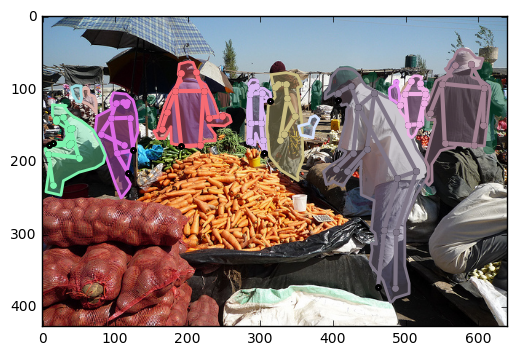

In [10]:
plt.imshow(I)
annIds = coco.getAnnIds(imgIds=imgInfo['id'], iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [23]:
def show_person_keypoints(img_id):
    catIds = coco.getCatIds(catNms=['person'])
    imgIds = coco.getImgIds(catIds=catIds)
    assert img_id < len(imgIds)
    imgInfo = coco.loadImgs(imgIds[img_id])[0]
    img = io.imread('data/coco/train2014/' + imgInfo['file_name'])
    annIds = coco.getAnnIds(imgIds=imgInfo['id'], iscrowd=None)
    anns = coco.loadAnns(annIds)
    # annsは複数人数の情報が入ったリスト
    plt.figure()
    plt.imshow(img)
    coco.showAnns(anns)

[407, 115, 1, 407, 105, 2, 0, 0, 0, 425, 95, 2, 0, 0, 0, 435, 124, 2, 457, 105, 2, 428, 187, 2, 447, 182, 2, 404, 210, 2, 419, 213, 2, 488, 222, 2, 515, 213, 2, 471, 293, 2, 487, 297, 2, 462, 372, 1, 486, 374, 2]


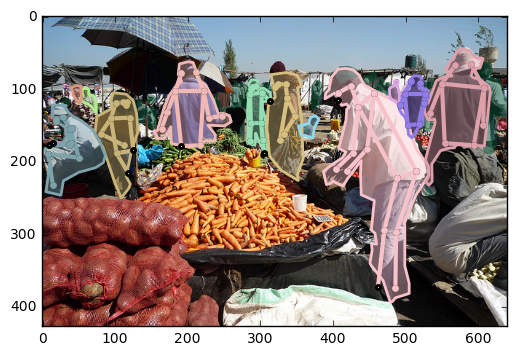

In [24]:
show_person_keypoints(0)

## 一部のパーツのみ取り出す

visibility flag v defined as v=0: not labeled (in which case x=y=0), v=1: labeled but not visible, and v=2: labeled and visible.

In [99]:
def show_person_keypoints(img_id):
    catIds = coco.getCatIds(catNms=['person'])
    imgIds = coco.getImgIds(catIds=catIds)
    assert img_id < len(imgIds)
    imgInfo = coco.loadImgs(imgIds[img_id])[0]
    img = io.imread('data/coco/train2014/' + imgInfo['file_name'])
    height, width, _ = img.shape
    annIds = coco.getAnnIds(imgIds=imgInfo['id'], iscrowd=None)
    anns = coco.loadAnns(annIds)
    noses = []
    for i in range(len(anns)):  # person loop
        keypoints = anns[i]['keypoints']
        nose_points = keypoints[0:3]
        # visible = 2 => labled and visible
        if nose_points[2] == 2:
            noses.append(nose_points)

    if noses == []:
        return

    plt.figure()
    plt.imshow(img)
    plt.axis('off')
    plt.xlim((0, width))
    plt.ylim((height, 0))
    for p in noses:
        x1, y1, visible = p
        plt.plot([x1], [y1], marker='o', markersize=3, color='red')

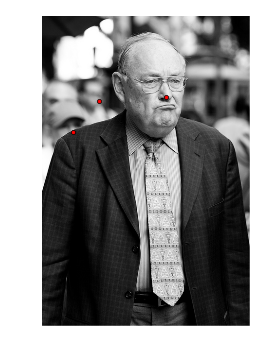

In [101]:
show_person_keypoints(4)